In [1]:
import datetime
import typing

import rich
import seaborn

from twon_lss.ranking.success_driven import Decay, Noise, Engagement

In [2]:
REFERENCE_DATETIME: datetime.datetime = datetime.datetime.now()
REFERENCE_TIMEDELTA: datetime.timedelta = datetime.timedelta(days=3)

NUM_OBSERVATIONS: int = 1_000

In [3]:
decay: Decay = Decay(minimum=0.2, reference_timedelta=REFERENCE_TIMEDELTA)
noise: Noise = Noise(low=0.6, high=1.4)

In [4]:
observations: typing.List[datetime.datetime] = [
    REFERENCE_DATETIME - (REFERENCE_TIMEDELTA * i / NUM_OBSERVATIONS)
    for i in reversed(range(NUM_OBSERVATIONS))
]
rich.print(observations[:5])

[
    datetime.datetime(2025, 6, 14, 11, 31, 3, 535222),
    datetime.datetime(2025, 6, 14, 11, 35, 22, 735222),
    datetime.datetime(2025, 6, 14, 11, 39, 41, 935222),
    datetime.datetime(2025, 6, 14, 11, 44, 1, 135222),
    datetime.datetime(2025, 6, 14, 11, 48, 20, 335222)
]

<Axes: ylabel='Density'>

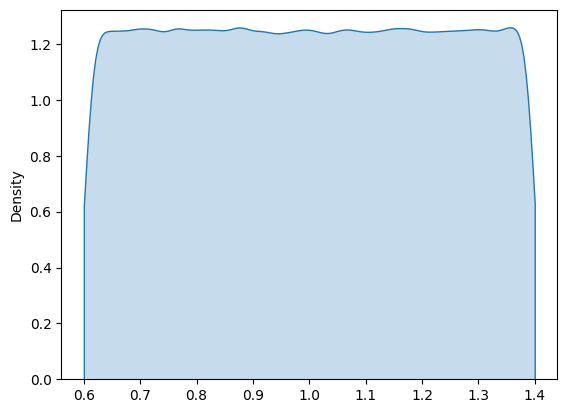

In [5]:
seaborn.kdeplot(
    noise.draw_samples(1_000_000),
    fill=True,
    clip=(noise.low, noise.high),
)

<Axes: >

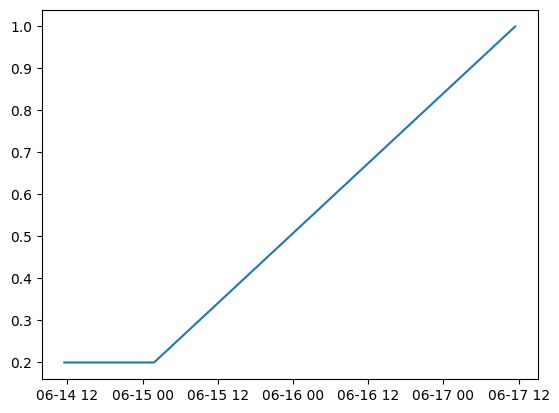

In [6]:
seaborn.lineplot(
    x=observations,
    y=[decay(obs, REFERENCE_DATETIME) for obs in observations],
)

In [7]:
kwargs = dict(reference_datetime=REFERENCE_DATETIME, decay=decay)

rich.print(f"""engagement for observations ({NUM_OBSERVATIONS=}):

{"count_based:":20} {Engagement(func="count_based", log_normalize=False)(observations, **kwargs)} 
{"count_based (log):":20} {Engagement(func="count_based", log_normalize=True)(observations, **kwargs)} 

{"decay_based:":20} {Engagement(func="decay_based", log_normalize=False)(observations, **kwargs)}
{"decay_based (log):":20} {Engagement(func="decay_based", log_normalize=True)(observations, **kwargs)}
""")

engagement for observations (NUM_OBSERVATIONS=1000):

count_based:         1000 
count_based (log):   6.907755278982137 

decay_based:         520.4000000000001
decay_based (log):   6.254597746638351